## Portfolio Analysis - Modern Portfolio Theory (MPT)

This short analysis intends to exemplify Modern Portfolio Theory (MPT) for retrieving optimal target weights. It is not meant to be any investment advice or rigorous review of the performance of MPT. Lets begin with some theory on the core MPT component, Mean Variance Optimizations (MVO). 

Recall that MVO seeks to find optimal asset allocations when both expected risk and return is considered. In the utility maximization we then denote a column vector of random future returns over a time period of $N$ assets as: $R = (R_1, R_2, \dots, R_N)^\top$. The column vector of expected values is $E[R] = \mu$, where each element $\mu_i=E[R_i]$. We let $w = (w_1, w_2, \dots, w_N)^\top$ be a column vector of portfolio weights. Finally, $\Sigma$ denotes the the covariance matrix of all asset returns in the vector $R$. Then, the MVO problem can be formulated as:

$$ \max_w   \: \: \:  w^\top \mu - \psi\mathbb{1}^\top \Lambda - \dfrac{\delta}{2}w^\top \Sigma w$$

$$  \sum_{i=1}^N w_i = 1 $$

$$ a \leq w_i \leq b, \ \forall i=\{1,2,\dots,N\} $$

$\Lambda $ is the vector of absolute values of portfolio weight changes, $\psi$ a fixed transaction cost, and $\mathbb{1}$ is a column vector of ones. $\delta$ the risk aversion parameter, denoting the trade-off between risk and return in the max-utility problem. The first constraint forces the portfolio to be fully invested in the included assets. The second constraint bounds the weights for each asset, where $a$ and $b$ is the lower and upper bound, respectively. MVO requires both $\mu$\ and $\Sigma$ to be estimated before the optimization is attempted, so lets do that. But before, some definitions.

Expected returns will be determined by the Capital Asset Pricing Model (CAPM). In this model, the vector of expected return $\mu_t$ is denoted:

$$ \mu_i = E[R_i] = r_f + \beta_{i, mkt}(E[R_{mkt}] - r_f) $$

$$ \beta_{i, mkt}=Cov(R_i, R_{mkt})/Var(R_{mkt}) $$

$R_i$ is the return of some asset, $R_{mkt}$ the total return of the market, and $r_f$ the risk-free interest rate available to all investors in the market. The estimate of $\beta_{i, mkt}$ can be obtained by using the sample covariance and variance. 

An estimate of the expected market return $E[\mu_{mkt}]$, denoted as $\hat{\mu}_{mkt}$, is obtained by taking the mean return over a lookback period for each asset, where the mean returns are denoted as $\hat{\lambda}_{i}$, and then weighing the means by their respective market weight $m_{i}$. In other words, $\hat{\mu}_{mkt} = m^{\top}\hat{\lambda}$ where $m=(m_{1},\dots,m_{N})^{\top}$ and $\hat{\lambda}=(\hat{\lambda}_{1},\dots, \hat{\lambda}_{N})^{\top}$. Now, the CAPM estimated return vector is denoted:

$$ \hat{\mu} = (\hat{\mu}_{1}, \dots, \hat{\mu}_{N})^{\top} $$.

The covariance matrix $\Sigma$ is constructed according to:

$$ \Sigma = \text{diag}(\sigma) \: C \: \text{diag}(\sigma) $$

where $\sigma$ is a column vector of standard deviations. $\text{diag}(\sigma)$ denotes a matrix with the elements of $\sigma$ on the main diagonal. $C$ is a correlation matrix where each element is the standard Pearson correlation between asset returns $R_i$.

## Data
The data included in the optimization procedure are monthly series on asset prices from which monthly returns are computed for all included assets. The assets included in the optimization are global indices: S\&P500 (U.S. large cap), Russel 2000 (U.S. small cap), FTSE U.S. Real Estate Investment Trust (REIT), MSCI EAFE (developed market outside the U.S. and Canada), MSCI Emerging Markets, BofA Merrill Lynch U.S.-Government Bond (all maturities), Barclays U.S. Corporate HY, Gold, and S\&P GSCI (diversified commodity index). The price data stretches from January 1992 to December 2013 with 189 observations in total.

In [71]:
from scipy import io
import numpy as np
import pandas as pd
import datetime as dt

mvo_data = io.loadmat('data/mvo_data.mat')
headers = mvo_data['Headers']
returns = np.array(mvo_data['Ret'])
#data = pd.DataFrame(data=returns,index=returns[1:,])
#mvo_data.keys()
#type(mvo_data['Ret'][0][0][0][0]), mvo_data['Ret'][0][0][0][0].shape, mvo_data['Ret'][0][0][0][1], headers[0][0][0], mvo_data['Ret'][0][0][1][1]
columns = [item[0][0] for item in headers]
data = [[row.flat[0] for row in line] for line in mvo_data['Ret'][0][0][0]]
index = [dt.datetime.fromordinal(item[0]).strftime('%Y-%m-%d') for item in mvo_data['Ret'][0][0][1] ]
df = pd.DataFrame(data=data,index=index, columns=columns)
df.head()

,S&P500 TR,Russell 2000 TR,FTSE REIT TR,MSCI EAFE TR,MSCI Emerging Markets TR,Barclays US Government TR,Barclays US Corporate High Yield TR,Gold TR,SP GSCI TR,US TBILL TR
1993-01-31,-0.018635,0.081027,0.048700,-0.021341,0.115766,-0.015568,0.035225,0.005060,0.027491,0.003486
1993-04-01,-0.006749,-0.005664,-0.040124,-0.099452,0.079766,-0.001961,0.037378,-0.040538,0.000087,0.006252
1993-05-01,0.029361,-0.035034,-0.003551,0.004704,-0.006946,0.006299,0.003798,-0.017764,0.029964,0.003847
1993-07-01,-0.010048,-0.034624,0.030033,0.016361,-0.102430,0.033044,0.023659,0.015103,0.021207,0.006386
1993-08-01,0.040852,0.034795,0.043447,-0.025593,0.010874,0.025201,0.015097,0.037746,-0.013935,0.003417


## Exploration

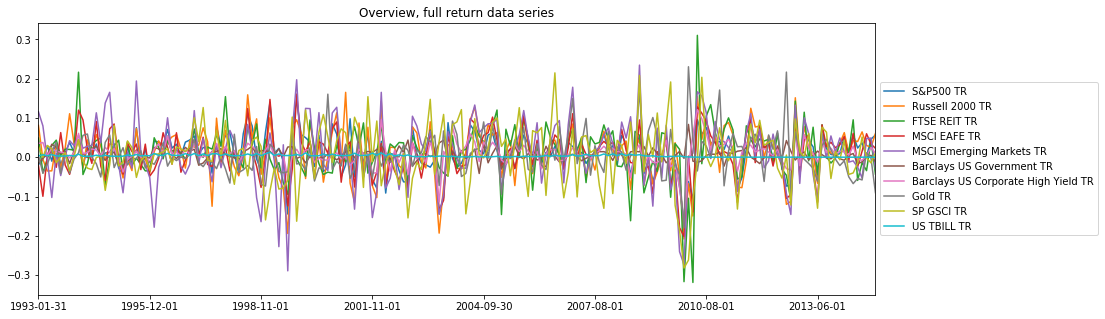

In [87]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plotdata=df
plt.figure()
plotdata.plot(figsize=(15,5), title="Overview, full return data series")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [101]:
corr_matrix = df.corr(method='pearson')
cov_matrix = df.cov()
corr_matrix

,S&P500 TR,Russell 2000 TR,FTSE REIT TR,MSCI EAFE TR,MSCI Emerging Markets TR,Barclays US Government TR,Barclays US Corporate High Yield TR,Gold TR,SP GSCI TR,US TBILL TR
S&P500 TR,1.000000,0.791352,0.534286,0.779702,0.660316,-0.153906,0.616575,0.002496,0.158581,0.129287
Russell 2000 TR,0.791352,1.000000,0.603087,0.691324,0.663276,-0.224422,0.618267,0.097540,0.226216,0.002848
FTSE REIT TR,0.534286,0.603087,1.000000,0.503986,0.375841,0.060991,0.558520,0.079118,0.211708,0.044277
MSCI EAFE TR,0.779702,0.691324,0.503986,1.000000,0.722860,-0.129269,0.609080,0.198384,0.292656,0.048198
MSCI Emerging Markets TR,0.660316,0.663276,0.375841,0.722860,1.000000,-0.177886,0.636969,0.288508,0.285591,-0.003717
Barclays US Government TR,-0.153906,-0.224422,0.060991,-0.129269,-0.177886,1.000000,-0.016405,0.259888,-0.140001,0.221968
Barclays US Corporate High Yield TR,0.616575,0.618267,0.558520,0.609080,0.636969,-0.016405,1.000000,0.219235,0.264991,-0.007259
Gold TR,0.002496,0.097540,0.079118,0.198384,0.288508,0.259888,0.219235,1.000000,0.260174,-0.105375
SP GSCI TR,0.158581,0.226216,0.211708,0.292656,0.285591,-0.140001,0.264991,0.260174,1.000000,0.026642
US TBILL TR,0.129287,0.002848,0.044277,0.048198,-0.003717,0.221968,-0.007259,-0.105375,0.026642,1.000000


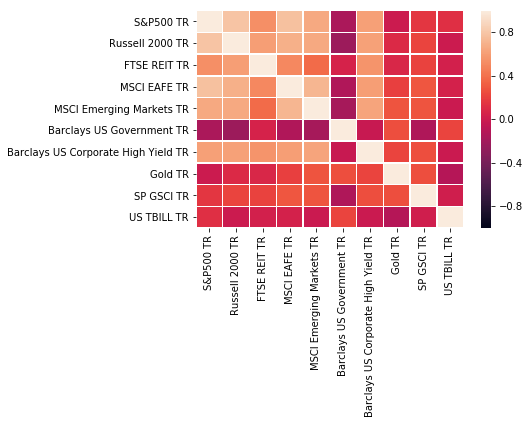

In [102]:
ax = sns.heatmap(corr_matrix, vmin=-1, vmax=1, linewidths=.5)

## Imports


## Imports


In [12]:
#Imports

#Calculation
import numpy as np
import pandas as pd

#Plotting
import matplotlib.pyplot as plt
import seaborn as sns

#Machine learning
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA

#Preprocessing
from sklearn.preprocessing import StandardScaler

#Validation
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

#Quantopian data
from quantopian.interactive.data.estimize import revisions_free
from quantopian.research import prices, symbols

##Data##

In [14]:
#Get prices
aapl_minute_closes = get_pricing(
    'AAPL', 
    fields='close_price', #modify to price, open_price, high, low or volume to change the field
    start_date='2014-01-01', #customize your pricing date range
    end_date = '2014-07-01', 
    frequency='minute', #change to daily for daily pricing
)
aapl_close = prices(
    assets=symbols('AAPL'),
    start='2013-01-01',
    end='2016-01-01',
)

##Visualisation##

##Analysis##

##Model##

##Performance##

##Summary##